# Logistic Regression Project Exercise 

**GOAL: Create a Classification Model that can predict whether or not a person has presence of heart disease based on physical features of that person (age,sex, cholesterol, etc...)**

**Complete the TASKs written in bold below.**

## Imports

**TASK: Run the cell below to import the necessary libraries.**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data

This database contains 14 physical attributes based on physical testing of a patient. Blood samples are taken and the patient also conducts a brief exercise test. The "goal" field refers to the presence of heart disease in the patient. It is integer (0 for no presence, 1 for presence). In general, to confirm 100% if a patient has heart disease can be quite an invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid expensive and invasive procedures.

Content

Attribute Information:

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target:0 for no presence of heart disease, 1 for presence of heart disease

Original Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease


----

**TASK: Run the cell below to read in the data.**

In [2]:
df = pd.read_csv(r"C:\Users\moham\Downloads\heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


----
----

# Machine Learning

## Train | Test Split and Scaling

**TASK: Separate the features from the labels into 2 objects, X and y.**

In [4]:
X = df.drop('target',axis=1)
y = df['target']

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

**TASK: Perform a train test split on the data, with the test size of 10% and a random_state of 101.**

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

**TASK: Create a StandardScaler object and normalize the X train and test set feature data. Make sure you only fit to the training data to avoid data leakage (data knowledge leaking from the test set).**

In [7]:
scaler = StandardScaler()

In [8]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Logistic Regression Model

**TASK: Create a Logistic Regression model 

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
log_model = LogisticRegression()

In [11]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [13]:
y_pred = log_model.predict(scaled_X_test)

### Coeffecients

**TASK: Report back the model's coefficients.**

In [12]:
print(log_model.coef_)

[[-0.07200459 -0.73512355  0.89380134 -0.26263404 -0.21252883  0.04626827
   0.12005867  0.4336183  -0.42815523 -0.5261547   0.38193418 -0.85118686
  -0.57463534]]


In [17]:
print("Intercept: ", log_model.intercept_)

Intercept:  [0.1769285]


---------

## Model Performance Evaluation

**TASK: Let's now evaluate your model on the remaining 10% of the data, the test set.**

**TASK: Create the following evaluations:**
* Confusion Matrix Array
* Confusion Matrix Plot
* Classification Report

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [15]:
accuracy_score(y_test,y_pred)

0.8387096774193549

In [16]:
confusion_matrix(y_test,y_pred)

array([[12,  3],
       [ 2, 14]], dtype=int64)

Confusion Matrix:
[[12  3]
 [ 2 14]]


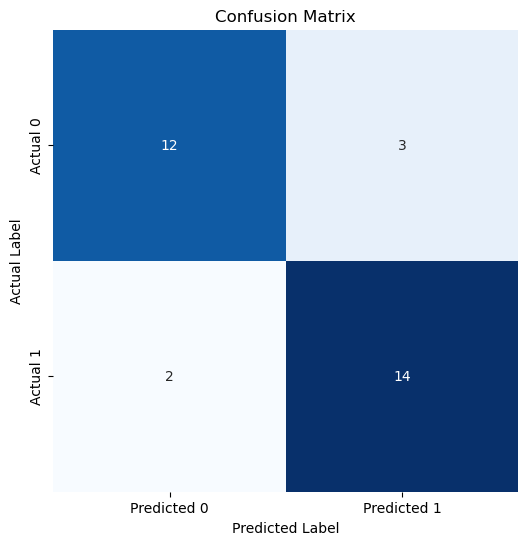

In [18]:
# Calculate and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

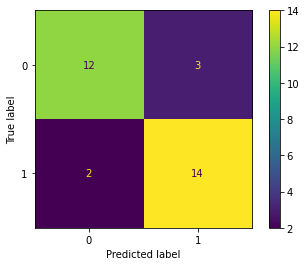

In [19]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



### Performance Curves

**TASK: Create the ROC Curve.**

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, roc_auc_score

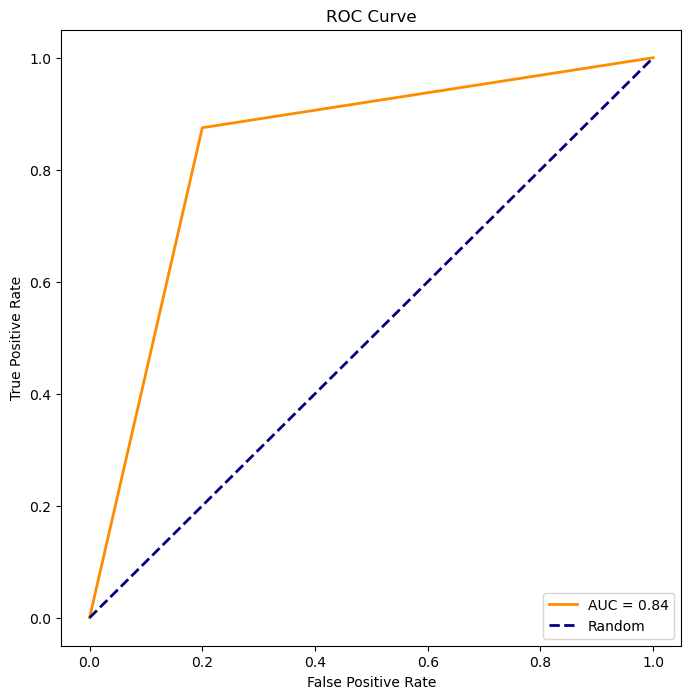

AUC: 0.84


In [25]:
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Print the AUC score
print(f'AUC: {roc_auc_score(y_test, y_pred):.2f}')

In [26]:
plot_roc_curve(log_model,scaled_X_test,y_test)

NameError: name 'plot_roc_curve' is not defined

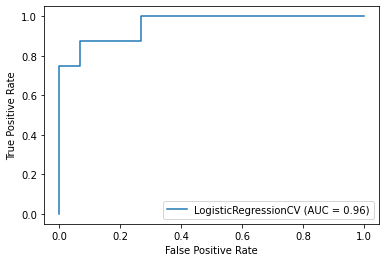

**Final Task: A patient with the following features has come into the medical office:**

    age          48.0
    sex           0.0
    cp            2.0
    trestbps    130.0
    chol        275.0
    fbs           0.0
    restecg       1.0
    thalach     139.0
    exang         0.0
    oldpeak       0.2
    slope         2.0
    ca            0.0
    thal          2.0

**TASK: What does your model predict for this patient? Do they have heart disease? How "sure" is your model of this prediction?**

*For convience, we created an array of the features for the patient above*

In [29]:
patient = [[ 54. ,   1. ,   0. , 122. , 286. ,   0. ,   0. , 116. ,   1. ,
          3.2,   1. ,   2. ,   2. ]]

In [30]:
print(log_model.predict(patient))

[0]


In [33]:
log_model.predict_proba(patient)[:, 1]

array([4.08196334e-23])

In [38]:
log_model.predict_proba(patient)

array([[1.00000000e+00, 4.08196334e-23]])

In [39]:
log_model.classes_

array([0, 1], dtype=int64)

In [35]:
predicted_class = log_model.predict(patient)
probability_positive_class = log_model.predict_proba(patient)[:, 1]

In [36]:
print(f"The model predicts that the patient has heart disease: {bool(predicted_class[0])}")
print(f"The model is {probability_positive_class[0]*100:.2f}% sure of this prediction.")

The model predicts that the patient has heart disease: False
The model is 0.00% sure of this prediction.


In [37]:
probabilities = log_model.predict_proba(patient)

# Output the probabilities
print(f"Probability of class 0 (No heart disease): {probabilities[0, 0]:.2f}")
print(f"Probability of class 1 (Heart disease): {probabilities[0, 1]:.2f}")

Probability of class 0 (No heart disease): 1.00
Probability of class 1 (Heart disease): 0.00


----

## Great Job!